In [1]:
import pandas as pd
import time,datetime

In [2]:
data=pd.read_csv('transactions_n100000.csv',encoding='utf-8')

In [12]:
result=[]
for k,group in data.groupby('ticket_id'):
    for m,n in group.groupby('order_timestamp'):
        ticket_id=k
        order_timestamp=m
        location=n['location'].values.tolist()[0]
        shake=0
        burger=0
        fries=0
        salad=0
        n=n.reset_index(drop=True)
        for i in range(len(n)):
            item=n.loc[i,'item_name']
            num=n.loc[i,'item_count']
            if item=='shake':
                shake=shake+num
            elif item=='burger':
                burger=burger+num
            elif item=='fries':
                fries=fries+num
            elif item=='salad':
                salad=salad+num
        output=[ticket_id,order_timestamp,location,shake,burger,fries,salad]
        result.append(output)

In [13]:
df=pd.DataFrame(result)
df.columns=['ticket_id','order_timestamp','location','shake','burger','fries','salad']
df

,ticket_id,order_timestamp,location,shake,burger,fries,salad
0,0x10000a,2019-01-29 00:48:00,9,0,1,1,0
1,0x100058,2019-05-05 00:08:00,6,0,2,2,0
2,0x1000c8,2019-01-28 19:24:00,9,4,4,5,1
3,0x10014c,2019-02-23 00:15:00,6,0,1,1,0
4,0x1001d8,2019-06-30 17:50:00,2,3,3,3,0
...,...,...,...,...,...,...,...
99995,0xffe96,2019-01-05 19:28:00,4,4,4,4,0
99996,0xffeed,2019-08-08 00:42:00,2,0,1,1,0
99997,0xfff07,2019-05-04 00:48:00,2,1,1,1,0
99998,0xfff4d,2019-07-18 00:17:00,3,0,2,2,0


In [18]:
df['timestamp']=df['order_timestamp'].apply(lambda x:int(time.mktime(time.strptime(x,"%Y-%m-%d %H:%M:%S"))))

In [19]:
df['month']=df['order_timestamp'].apply(lambda x: time.strftime("%m",time.strptime(x,"%Y-%m-%d %H:%M:%S")))

In [20]:
df

,ticket_id,order_timestamp,location,shake,burger,fries,salad,timestamp,month
0,0x10000a,2019-01-29 00:48:00,9,0,1,1,0,1548694080,01
1,0x100058,2019-05-05 00:08:00,6,0,2,2,0,1556986080,05
2,0x1000c8,2019-01-28 19:24:00,9,4,4,5,1,1548674640,01
3,0x10014c,2019-02-23 00:15:00,6,0,1,1,0,1550852100,02
4,0x1001d8,2019-06-30 17:50:00,2,3,3,3,0,1561888200,06
...,...,...,...,...,...,...,...,...,...
99995,0xffe96,2019-01-05 19:28:00,4,4,4,4,0,1546687680,01
99996,0xffeed,2019-08-08 00:42:00,2,0,1,1,0,1565196120,08
99997,0xfff07,2019-05-04 00:48:00,2,1,1,1,0,1556902080,05
99998,0xfff4d,2019-07-18 00:17:00,3,0,2,2,0,1563380220,07


In [23]:
def get_dummy(data,categorical):
    dummy_df=pd.get_dummies(data,columns=categorical,
                       prefix=categorical,
                       prefix_sep='_',
                       dummy_na=False,
                       drop_first=False)
    return dummy_df

## 1

In [22]:
sub1=df[['shake', 'burger', 'fries', 'salad','location']]
sub1

,shake,burger,fries,salad,location
0,0,1,1,0,9
1,0,2,2,0,6
2,4,4,5,1,9
3,0,1,1,0,6
4,3,3,3,0,2
...,...,...,...,...,...
99995,4,4,4,0,4
99996,0,1,1,0,2
99997,1,1,1,0,2
99998,0,2,2,0,3


In [26]:
cate=['location']
dummy_df=get_dummy(sub1,cate)
dummy_df

,shake,burger,fries,salad,location_1,location_2,location_3,location_4,location_5,location_6,location_7,location_8,location_9
0,0,1,1,0,0,0,0,0,0,0,0,0,1
1,0,2,2,0,0,0,0,0,0,1,0,0,0
2,4,4,5,1,0,0,0,0,0,0,0,0,1
3,0,1,1,0,0,0,0,0,0,1,0,0,0
4,3,3,3,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,4,4,0,0,0,0,1,0,0,0,0,0
99996,0,1,1,0,0,1,0,0,0,0,0,0,0
99997,1,1,1,0,0,1,0,0,0,0,0,0,0
99998,0,2,2,0,0,0,1,0,0,0,0,0,0


C:\Users\xzp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\xzp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\xzp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\xzp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: De

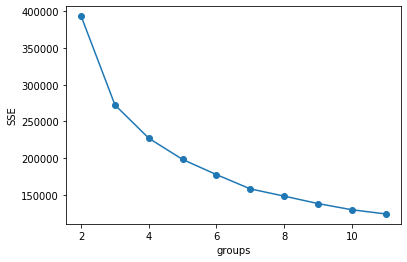

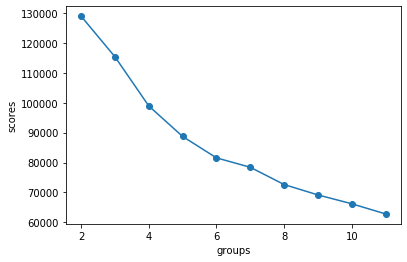

In [28]:
import sklearn.cluster as skc
from sklearn import metrics
import matplotlib.pyplot as plt

distortions=[]
scores=[]
for i in range(2,12):
    km = skc.KMeans(n_clusters=i, random_state=1)
    y_pred=km.fit_predict(dummy_df) 
    scores.append(metrics.calinski_harabaz_score(dummy_df, y_pred))
    distortions.append(km.inertia_)
    
plt.plot(range(2,12),distortions,marker='o')
plt.xlabel('groups')
plt.ylabel("SSE")
plt.show()

plt.plot(range(2,12),scores,marker='o')
plt.xlabel('groups')
plt.ylabel("scores")
plt.show()

In [30]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
scaled_df = min_max_scaler.fit_transform(dummy_df)
scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns=dummy_df.columns
scaled_df

,shake,burger,fries,salad,location_1,location_2,location_3,location_4,location_5,location_6,location_7,location_8,location_9
0,0.0,0.2,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.4,0.25,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.8,0.8,1.00,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.2,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.6,0.6,0.50,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.8,0.8,0.75,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.2,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.2,0.2,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.4,0.25,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


C:\Users\xzp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\xzp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\xzp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\xzp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: De

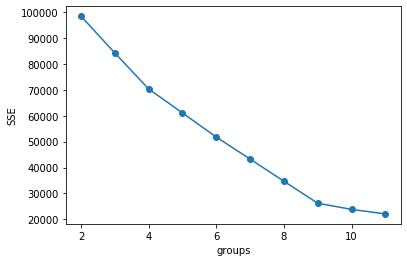

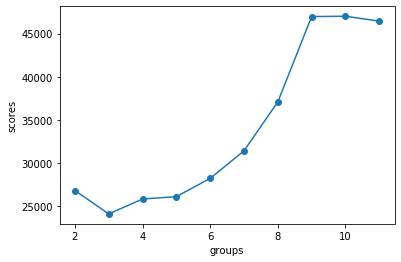

In [31]:
distortions=[]
scores=[]
for i in range(2,12):
    km = skc.KMeans(n_clusters=i, random_state=1)
    y_pred=km.fit_predict(scaled_df) 
    scores.append(metrics.calinski_harabaz_score(scaled_df, y_pred))
    distortions.append(km.inertia_)
    
plt.plot(range(2,12),distortions,marker='o')
plt.xlabel('groups')
plt.ylabel("SSE")
plt.show()

plt.plot(range(2,12),scores,marker='o')
plt.xlabel('groups')
plt.ylabel("scores")
plt.show()

## 2

In [32]:
sub2=df[['shake', 'burger', 'fries', 'salad','location','month']]

In [34]:
cate=['location','month']
dummy_df=get_dummy(sub2,cate)
dummy_df

,shake,burger,fries,salad,location_1,location_2,location_3,location_4,location_5,location_6,...,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12
0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,2,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,4,4,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,3,3,3,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,4,4,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
99997,1,1,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
99998,0,2,2,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


C:\Users\xzp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\xzp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\xzp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\xzp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: De

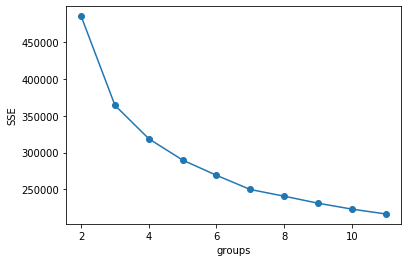

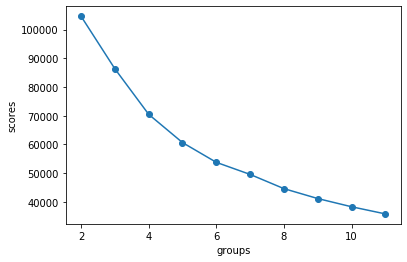

In [35]:
import sklearn.cluster as skc
from sklearn import metrics
import matplotlib.pyplot as plt

distortions=[]
scores=[]
for i in range(2,12):
    km = skc.KMeans(n_clusters=i, random_state=1)
    y_pred=km.fit_predict(dummy_df) 
    scores.append(metrics.calinski_harabaz_score(dummy_df, y_pred))
    distortions.append(km.inertia_)
    
plt.plot(range(2,12),distortions,marker='o')
plt.xlabel('groups')
plt.ylabel("SSE")
plt.show()

plt.plot(range(2,12),scores,marker='o')
plt.xlabel('groups')
plt.ylabel("scores")
plt.show()

In [37]:
km = skc.KMeans(n_clusters=3, random_state=1)
y_pred=km.fit_predict(dummy_df)


r1=pd.Series(km.labels_).value_counts()
r2=pd.DataFrame(km.cluster_centers_)
r=pd.concat([r2,r1],axis=1)
r.columns=list(dummy_df.columns)+[u'类别数目']

r.T

,0,1,2
shake,0.384397,3.360154,0.109164
burger,1.211901,3.935408,0.288715
fries,1.491205,4.080985,2.889805
salad,0.279304,0.145577,2.601090
location_1,0.074647,0.029847,0.195995
location_2,0.260060,0.070796,0.039219
location_3,0.076851,0.031741,0.195357
location_4,0.060852,0.241355,0.044618
location_5,0.070709,0.031153,0.195602
location_6,0.257101,0.073768,0.040348


## 3

In [39]:
sub3=df[['shake', 'burger', 'fries', 'salad']]
sub3

,shake,burger,fries,salad
0,0,1,1,0
1,0,2,2,0
2,4,4,5,1
3,0,1,1,0
4,3,3,3,0
...,...,...,...,...
99995,4,4,4,0
99996,0,1,1,0
99997,1,1,1,0
99998,0,2,2,0


C:\Users\xzp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\xzp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\xzp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\xzp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: De

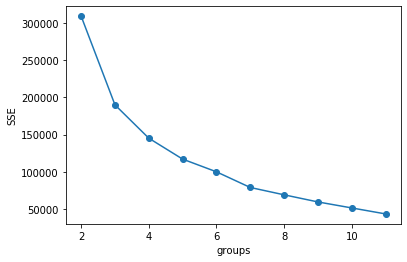

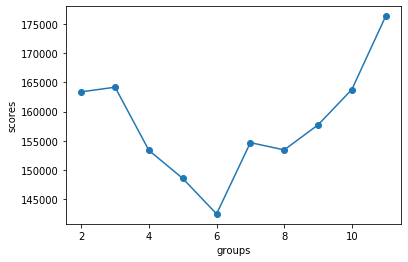

In [40]:
distortions=[]
scores=[]
for i in range(2,12):
    km = skc.KMeans(n_clusters=i, random_state=1)
    y_pred=km.fit_predict(sub3) 
    scores.append(metrics.calinski_harabaz_score(sub3, y_pred))
    distortions.append(km.inertia_)
    
plt.plot(range(2,12),distortions,marker='o')
plt.xlabel('groups')
plt.ylabel("SSE")
plt.show()

plt.plot(range(2,12),scores,marker='o')
plt.xlabel('groups')
plt.ylabel("scores")
plt.show()

In [41]:
km = skc.KMeans(n_clusters=3, random_state=1)
y_pred=km.fit_predict(sub3)


r1=pd.Series(km.labels_).value_counts()
r2=pd.DataFrame(km.cluster_centers_)
r=pd.concat([r2,r1],axis=1)
r.columns=list(sub3.columns)+[u'类别数目']

r.T

,0,1,2
shake,0.109164,0.384397,3.360154
burger,0.288715,1.211901,3.935408
fries,2.889805,1.491205,4.080985
salad,2.601090,0.279304,0.145577
类别数目,20373.000000,49004.000000,30623.000000


In [42]:
km = skc.KMeans(n_clusters=11, random_state=1)
y_pred=km.fit_predict(sub3)


r1=pd.Series(km.labels_).value_counts()
r2=pd.DataFrame(km.cluster_centers_)
r=pd.concat([r2,r1],axis=1)
r.columns=list(sub3.columns)+[u'类别数目']

r.T

,0,1,2,3,4,5,6,7,8,9,10
shake,1.400583,3.811686,0.094129,2.534105e-01,1.199041e-13,2.778576,0.664236,0.189355,1.214584e-13,4.785500e+00,-8.815171e-14
burger,1.943104,4.013540,0.446519,1.000000e+00,2.099165e+00,3.021119,4.422321,0.559032,-2.140510e-13,5.000000e+00,-5.950795e-14
fries,2.187676,4.114652,2.283694,1.000000e+00,2.132678e+00,3.369802,4.549461,4.523226,1.000000e+00,5.000000e+00,3.000000e+00
salad,0.244572,0.101111,1.837175,-3.566036e-13,3.351252e-02,0.348683,0.127140,3.964194,1.000000e+00,1.132427e-14,3.000000e+00
类别数目,9948.000000,13589.000000,13014.000000,1.935200e+04,8.743000e+03,9186.000000,3154.000000,3100.000000,8.764000e+03,4.993000e+03,6.157000e+03
